In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import os
from PIL import Image
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms

In [2]:
df = pd.read_excel(io=f"./dataset/train.xlsx", sheet_name="Sheet1").values

In [152]:
transform = transforms.Compose([
    transforms.Resize([362, 256]),  # 短边缩到 256
    transforms.RandomHorizontalFlip(0.5),
    transforms.RandomVerticalFlip(0.5)
])

(256, 362)
(256, 362)
(256, 362)
(256, 362)


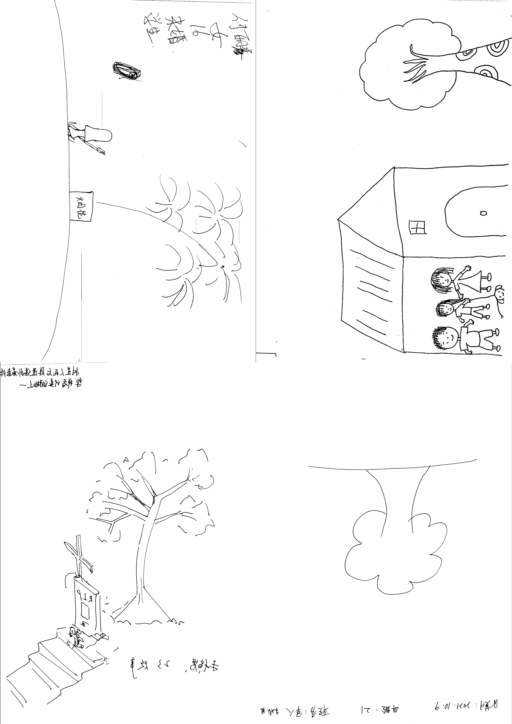

In [153]:
# 0 -> 右看， 13 --> 左看， 77 --> 上看， 150 --> 下看
canvas = Image.new("RGB", (256*2, 362*2))
i=0
for idx in [0,77,13,150]:
    filename = df[idx,0].replace("/", "_")
    X = Image.open(f"./绘画分类数据集/{df[idx, 1]}/焦虑/{df[idx, 2]}/{filename}").convert('RGB')
    if X.size[0] > X.size[1]:
        X = X.transpose(Image.TRANSPOSE) # 确保不压缩是等比缩放
    r, c = i//2, i%2
    canvas.paste(transform(X), (r*256,c*362))
    i+=1

canvas.show()